In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies_ratings_df = movies_df.merge(ratings_df,on='movieId')
movies_ratings_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


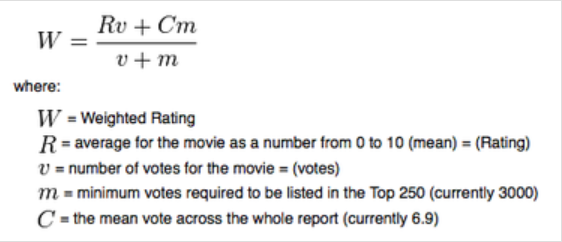

In [27]:
new_df = pd.DataFrame(movies_ratings_df.groupby('title')['rating'].agg(['count','mean']).sort_values(by='count',ascending=False))
new_df.reset_index(inplace=True)

In [30]:
r = new_df['mean']
v = new_df['count']
c = new_df['mean'].mean()
m = new_df['count'].quantile(0.6)
w = ((r*v) + (c*m))/(v+m)
new_df['weight'] = w

In [34]:
new_df[new_df['count'] >100].sort_values(by='weight',ascending=False).head(20)

,title,count,mean,weight
1,"Shawshank Redemption, The (1994)",317,4.429022,4.414485
21,"Godfather, The (1972)",192,4.289062,4.268110
10,Fight Club (1999),218,4.272936,4.254728
73,"Godfather: Part II, The (1974)",129,4.259690,4.229696
75,Goodfellas (1990),126,4.250000,4.219612
13,"Usual Suspects, The (1995)",204,4.237745,4.218988
114,"Departed, The (2006)",107,4.252336,4.216663
5,Star Wars: Episode IV - A New Hope (1977),251,4.231076,4.215881
44,"Dark Knight, The (2008)",149,4.238255,4.212742
9,Schindler's List (1993),220,4.225000,4.207811
